## Overturning in density space

This is a test notebook for computing overturning in density space using `xgcm` and `xhitogram` libraries. Here, we use monthly data for one hindcast and one ensemble member.

In [1]:
from xgcm import Grid
from xhistogram.xarray import histogram
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster()
client = Client(cluster)

print(client)

<Client: 'tcp://127.0.0.1:44268' processes=4 threads=4, memory=16.00 GiB>


distributed.diskutils - INFO - Found stale lock file and directory '/home/users/hkhatri/Git_Repo/AMOC_Variability_DePreSys_MET/Notebooks/Quick_Checks/dask-worker-space/worker-rzpyklmk', purging
distributed.diskutils - INFO - Found stale lock file and directory '/home/users/hkhatri/Git_Repo/AMOC_Variability_DePreSys_MET/Notebooks/Quick_Checks/dask-worker-space/worker-mu_0l7i3', purging


In [2]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44268,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:44628,Total threads: 1
Dashboard: http://127.0.0.1:39031/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:41323,


In [2]:
var_list = ['thetao', 'so', 'uo', 'vo']

ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

year, r = (2010, 0) 

ds = []
for var in var_list:
    
    var_path = "s" + str(year) +"-r" + str(r+1) + "i1p1f2/Omon/"+ var +"/gn/files/d20200417/"
    ds1 = xr.open_mfdataset(ppdir + var_path + "*.nc")
    
    #if(var == 'uo'):
    #    ds1 = ds1.rename({'i': 'iq'})
    #elif(var == 'vo'):
    #    ds1 = ds1.rename({'j': 'jq'})
    
    ds1 = ds1.isel(i=slice(749,1199), j = slice(699, 1149))
    ds1 = ds1.drop(['time_bnds', 'vertices_latitude', 'vertices_longitude'])
    ds.append(ds1)
    
#ds = xr.merge(ds)

In [3]:
print(ds[0])

<xarray.Dataset>
Dimensions:    (time: 125, lev: 75, bnds: 2, j: 450, i: 450)
Coordinates:
  * time       (time) object 2010-11-16 00:00:00 ... 2021-03-16 00:00:00
  * lev        (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j          (j) int32 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
  * i          (i) int32 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
    latitude   (j, i) float32 dask.array<chunksize=(450, 450), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(450, 450), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    lev_bnds   (time, lev, bnds) float64 dask.array<chunksize=(2, 75, 2), meta=np.ndarray>
    thetao     (time, lev, j, i) float32 dask.array<chunksize=(2, 75, 450, 450), meta=np.ndarray>
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cre

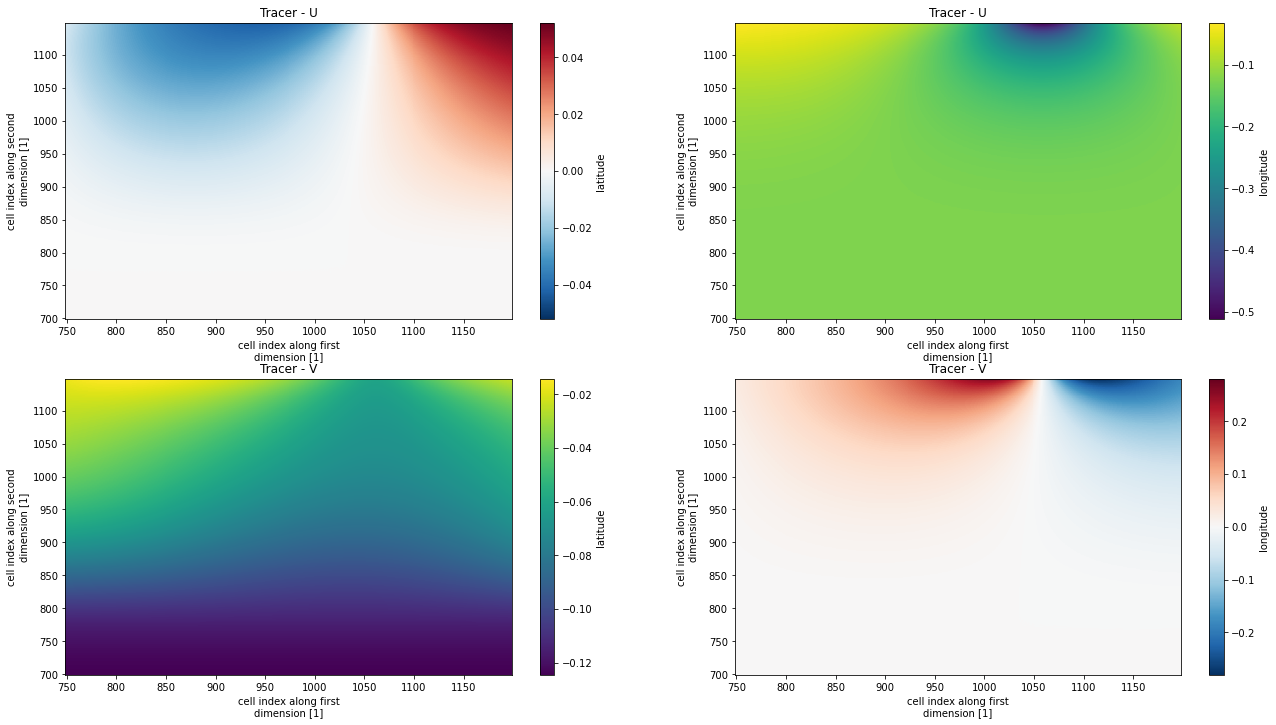

In [4]:
fig = plt.figure(figsize=[22,12])

plt.subplot(2,2,1)
(ds[0].latitude - ds[2].latitude).plot()
plt.title('Tracer - U')

plt.subplot(2,2,2)
(ds[0].longitude - ds[2].longitude).plot()
plt.title('Tracer - U')

plt.subplot(2,2,3)
(ds[0].latitude - ds[3].latitude).plot()
plt.title('Tracer - V');

plt.subplot(2,2,4)
(ds[0].longitude - ds[3].longitude).plot()
plt.title('Tracer - V');

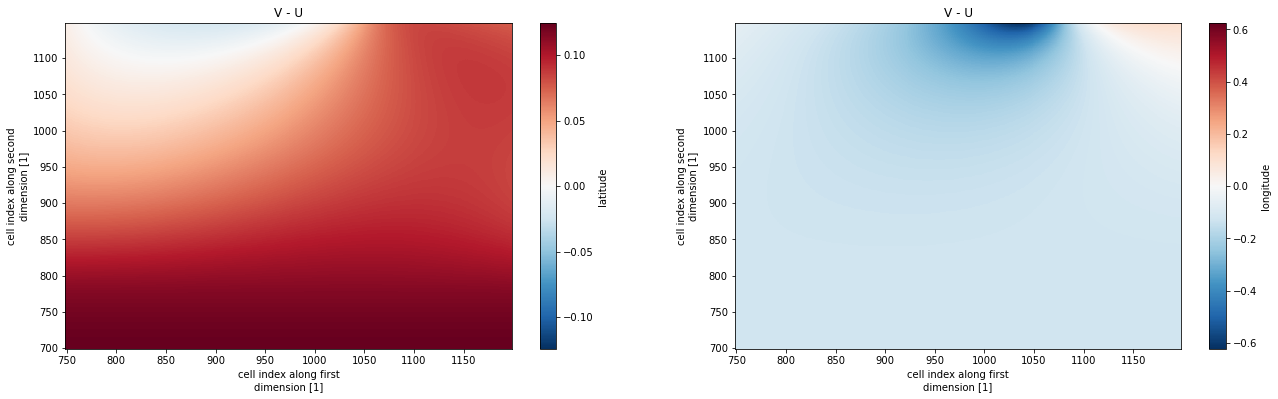

In [6]:
fig = plt.figure(figsize=[22,6])

plt.subplot(1,2,1)
(ds[3].latitude - ds[2].latitude).plot()
plt.title('V - U')

plt.subplot(1,2,2)
(ds[3].longitude - ds[2].longitude).plot()
plt.title('V - U');

Ideally on a C-grid, tracer and V points should be on longitudes. Similarly, tracer and U points should be on same latitudes. There are differences. Let's check this with original data downloaded from Met office archive.

The same issue is present in the test dataset. It seems that grid cells at high-latitudes are arranged in a way that lats/lons do not exactly match.

In [7]:
path = "/home/users/hkhatri/DePreSys4_Data/Test_Data/ONM_Monthly/"
ds_T = xr.open_mfdataset(path + "nemo_av830o_1m_19810301-19810401_grid-T.nc")
ds_U = xr.open_mfdataset(path + "nemo_av830o_1m_19810301-19810401_grid-U.nc")
ds_V = xr.open_mfdataset(path + "nemo_av830o_1m_19810301-19810401_grid-V.nc")

In [8]:
print(ds_T)

<xarray.Dataset>
Dimensions:                (y: 1207, x: 1442, nvertex: 4, deptht: 75, axis_nbounds: 2, deptht300: 35, time_counter: 1)
Coordinates:
    nav_lat                (y, x) float32 dask.array<chunksize=(1207, 1442), meta=np.ndarray>
    nav_lon                (y, x) float32 dask.array<chunksize=(1207, 1442), meta=np.ndarray>
  * deptht                 (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
  * deptht300              (deptht300) float32 0.5058 1.556 ... 271.4 300.9
    time_centered          (time_counter) object dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter           (time_counter) float64 0.0
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/74)
    bounds_lon             (y, x, nvertex) float32 dask.array<chunksize=(1207, 1442, 4), meta=np.ndarray>
    bounds_lat             (y, x, nvertex) float32 dask.array<chunksize=(1207, 1442, 4), meta=np.ndarray>
    area                   (y, x) float32 dask.array<chunksize=

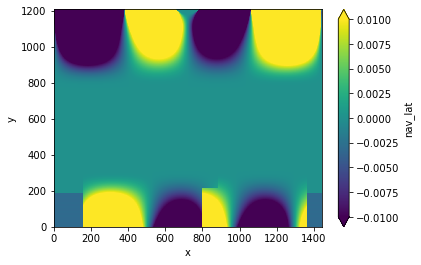

In [14]:
(ds_T.nav_lat - ds_U.nav_lat).plot(vmin=-1e-2, vmax=1e-2)